<a href="https://colab.research.google.com/github/mmdreza-ghorbani/Thesis_codes/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [ ]:

import pandas as pd
#url = 'https://docs.google.com/spreadsheets/d/1lpuG4rGmb-erP_-JqYMgogRdL8eH4xQi/edit?usp=sharing&ouid=114255579325312313141&rtpof=true&sd=true'
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/AIRNOW/pm10.xlsx'
newIndex = pd.read_excel(url)
newIndex.drop(newIndex[['mantaghe12','mantaghe10','mantaghe11','sadr','mantaghe4','parkRoz']], axis=1, inplace=True)
newIndex['Datetime'] = pd.DatetimeIndex(newIndex['Datetime'])
newIndex.set_index('Datetime',inplace = True)
newIndex = newIndex.sort_index()
#newIndex = newIndex['2017-01-01 00:00:00':'2021-01-01 00:00:00']
newIndex.astype(float)
dfnotna = newIndex[newIndex['mantaghe22'].notna()]
dfisna = newIndex[newIndex['mantaghe22'].isna()]
listOfCulomns = newIndex.columns.to_list()
listOfCulomns.remove('mantaghe22')
dfnotna = dfnotna.sort_index()
#df_train, df_test = datawig.utils.random_split(dfnotna)


Mounted at /content/drive


In [ ]:
df_train = dfnotna

In [ ]:
df_test = dfnotna['2019-11-01 00:00:00':'2020-01-01 00:00:00']
a = dfnotna['2017-01-01 00:00:00':'2019-11-01 00:00:00']
b = dfnotna['2020-01-01 00:00:00':]
dfnotna.reset_index(inplace=True)
a.reset_index(inplace=True)
b.reset_index(inplace=True)
df_train = pd.merge(a,b, how='outer',on=dfnotna.columns.to_list() )
df_train['Datetime'] = pd.DatetimeIndex(df_train['Datetime'])
df_train.set_index('Datetime',inplace = True)
df_train = df_train.sort_index()
dfnotna['Datetime'] = pd.DatetimeIndex(dfnotna['Datetime'])
dfnotna.set_index('Datetime',inplace = True)
dfnotna = dfnotna.sort_index()

# import data 2


In [ ]:
import pandas as pd
#url = 'https://docs.google.com/spreadsheets/d/1lpuG4rGmb-erP_-JqYMgogRdL8eH4xQi/edit?usp=sharing&ouid=114255579325312313141&rtpof=true&sd=true'
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/AIRNOW/pm10.xlsx'
newIndex = pd.read_excel(url)
newIndex.drop(newIndex[['mantaghe12','mantaghe10','mantaghe11','sadr','mantaghe4','parkRoz']], axis=1, inplace=True)
newIndex['Datetime'] = pd.DatetimeIndex(newIndex['Datetime'])
newIndex.set_index('Datetime',inplace = True)
newIndex = newIndex.sort_index()
knn = pd.read_excel('/content/drive/My Drive/AIRNOW/impute_using_knn.xlsx')
#knn.drop(newIndex[['mantaghe12','mantaghe10','mantaghe11','sadr','mantaghe4','parkRoz']], axis=1, inplace=True)
knn['Datetime'] = pd.DatetimeIndex(knn['Datetime'])
knn.set_index('Datetime',inplace = True)
knn = knn.sort_index()
newIndex['mantaghe22'] = knn['mantaghe22']
df_test = newIndex['2019-11-01 00:00:00':'2020-01-01 00:00:00']
newIndex.astype(float)
#dfnotna = newIndex[newIndex['mantaghe22'].notna()]
#dfisna = newIndex[newIndex['mantaghe22'].isna()]
listOfCulomns = newIndex.columns.to_list()
listOfCulomns.remove('mantaghe22')
newIndex = newIndex.sort_index()
#df_train, df_test = datawig.utils.random_split(dfnotna)
a = newIndex['2017-01-01 00:00:00':'2019-11-01 00:00:00']
b = newIndex['2020-01-01 00:00:00':'2021-01-01 00:00:00']
newIndex.reset_index(inplace=True)
a.reset_index(inplace=True)
b.reset_index(inplace=True)
df_train = pd.merge(a,b, how='outer',on=newIndex.columns.to_list() )
df_train['Datetime'] = pd.DatetimeIndex(df_train['Datetime'])
df_train.set_index('Datetime',inplace = True)
df_train = df_train.sort_index()
newIndex['Datetime'] = pd.DatetimeIndex(newIndex['Datetime'])
newIndex.set_index('Datetime',inplace = True)
newIndex = newIndex.sort_index()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#from google.colab import files
#newURL='/content/drive/My Drive/AIRNOW/'
#df_train['mantaghe22'].to_csv(newURL+'pm10_train_xgboost.csv')
#df_test['mantaghe22'].to_csv(newURL+'pm10_test_xgboost.csv')
#import xgboost as xgb
# read in data
#dtrain = xgb.DMatrix(newURL+'pm10_train_xgboost.csv?format=csv')
#dtest = xgb.DMatrix(newURL+'pm10_train_xgboost.csv?format=csv')
# specify parameters via map
#param = {'max_depth':5, 'eta':3, 'objective':'binary:logistic' }
#num_round = 11000
#bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)


**import** **library**

In [ ]:
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error,mean_absolute_error

#from sklearn.datasets import load_diabetes
#X, y = load_diabetes(return_X_y=True)

train and test

In [ ]:
list_i = df_train.columns.to_list()
list_i.remove('mantaghe22')
X_train = np.array(df_train[list_i])
y_train = np.array(df_train['mantaghe22'])

In [ ]:

list_i = df_test.columns.to_list()
list_i.remove('mantaghe22')
X_test = np.array(df_test[list_i])
y_test = np.array(df_test['mantaghe22'])

Regression all null values

In [ ]:
temppd = pd.DataFrame(columns=['A'])
from google.colab import files
newURL='/content/drive/My Drive/AIRNOW/'
for item in newIndex.columns.to_list():
  dfnotna = newIndex[newIndex[item].notna()]
  dfisna = newIndex[newIndex[item].isna()]
  listOfCulomns = newIndex.columns.to_list()
  listOfCulomns.remove(item)
  print(item)
  dfnotna = dfnotna.sort_index()
  df_train = dfnotna
  X_train = np.array(df_train[list_i])
  y_train = np.array(df_train[item])
  regressor = xgb.XGBRegressor(objective="reg:squarederror",random_state=42,
                             eval_metric='rmse',
       learning_rate=0.05,
    max_depth=10,
     min_child_weight=3,
      n_estimators=700
      , subsample=.7,
 tree_method = 'gpu_hist',
 missing=None)
  regressor.fit(X_train
    ,y_train
    ,verbose=True
    ,eval_metric='rmse'
    )
  y_pred_train = regressor.predict(X_train)
  y_pred_null  = regressor.predict(np.array(dfisna[list_i]))
  print("RMSE Train: "+np.sqrt(mean_squared_error(y_train, y_pred_train)).astype(str))
  df_null_train = pd.DataFrame({item: y_pred_null.ravel()})  # 1st row as the column names
  dfisna.reset_index(inplace=True)
  df_null_train['Datetime'] = dfisna['Datetime']
  dfisna['Datetime'] = pd.DatetimeIndex(dfisna['Datetime'])
  dfisna.set_index('Datetime',inplace = True)
  dfisna = dfisna.sort_index()
  df_null_pred = pd.DataFrame({item: y_pred_train.ravel()})
  dfnotna.reset_index(inplace=True)
  df_null_pred['Datetime'] = dfnotna['Datetime']
  dfnotna['Datetime'] = pd.DatetimeIndex(dfnotna['Datetime'])
  dfnotna.set_index('Datetime',inplace = True)
  dfnotna = dfnotna.sort_index()
  df_all = pd.merge(df_null_train,df_null_pred, how='outer',on=df_null_train.columns.to_list() )
  df_all['Datetime'] = pd.DatetimeIndex(df_all['Datetime'])
  df_all.set_index('Datetime',inplace = True)
  df_all = df_all.sort_index()
  df_null_pred['Datetime'] = pd.DatetimeIndex(df_null_pred['Datetime'])
  df_null_pred.set_index('Datetime',inplace = True)
  predictions = df_null_pred.sort_index()
  df_null_train['Datetime'] = pd.DatetimeIndex(df_null_train['Datetime'])
  df_null_train.set_index('Datetime',inplace = True)
  df_null_train = df_null_train.sort_index()
  temppd[item] = df_all[item]
temppd.drop(temppd[['A']], axis=1, inplace=True)
temppd.to_excel(newURL+'pm10_Imputation_GXBoost.xlsx')

mahalati
RMSE Train: 3.6516102353378277
aghdasieh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 0.009842636711124559
pounak


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 2.556297120342489
pirouzi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 2.8057234464387597
tarbiatModares


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 2.2978880354953093
setadBohran


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 2.332331342459639
shadAbad


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 5.259909746483658
sharif


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 3.635172120819424
mantaghe20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 2.4789652045309283
mantaghe2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 2.0420611082089697
mantaghe16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 1.7095207133183563
mantaghe19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 6.8319469694524795
mantaghe21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 3.289913789904391
mantaghe22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 4.260722277166227
golbarg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 1.9510978845264575
masoudieh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 1.2477120873716896
fath


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE Train: 3.267868368066151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Plotter

In [ ]:
def plotMultiline(cvc):
    t = cvc.index
    headerList =cvc.columns.tolist()
    fig, axes = plt.subplots(len(headerList), 1, sharex=True, sharey=True)
    #fig.set_figheight(10)
    #fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
    fig.suptitle("All Data with interpolation", fontsize=16)
    i = 0
    for item in headerList:

        tempppd = pd.DataFrame(columns=['A'])
        tempppd['interpolate'] = cvc[item]
        tempppd['main'] = dfall[item]
        axes[i].plot(t, tempppd['interpolate'], 'r', label="after" )
        #axes[i].plot(t, temppd['main'], 'k--', label="Before interpolation")
        axes[i].plot(t, tempppd['main'], 'b',label="Before")
        axes[i].set_title(item, loc='right', color='gray' )
       # axes[i].plot(temppd)
        axes[i].legend(loc='upper left');
        i += 1


plot not null rerences

In [ ]:
import matplotlib.pyplot as plt
dfall = newIndex
newURL='/content/drive/My Drive/AIRNOW/'
temppd = pd.read_excel(newURL+'pm10_Imputation_GXBoost.xlsx')
temppd['Datetime'] = pd.DatetimeIndex(temppd['Datetime'])
temppd.set_index('Datetime',inplace = True)
temppd = temppd.sort_index()
plotMultiline(temppd)

NameError: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


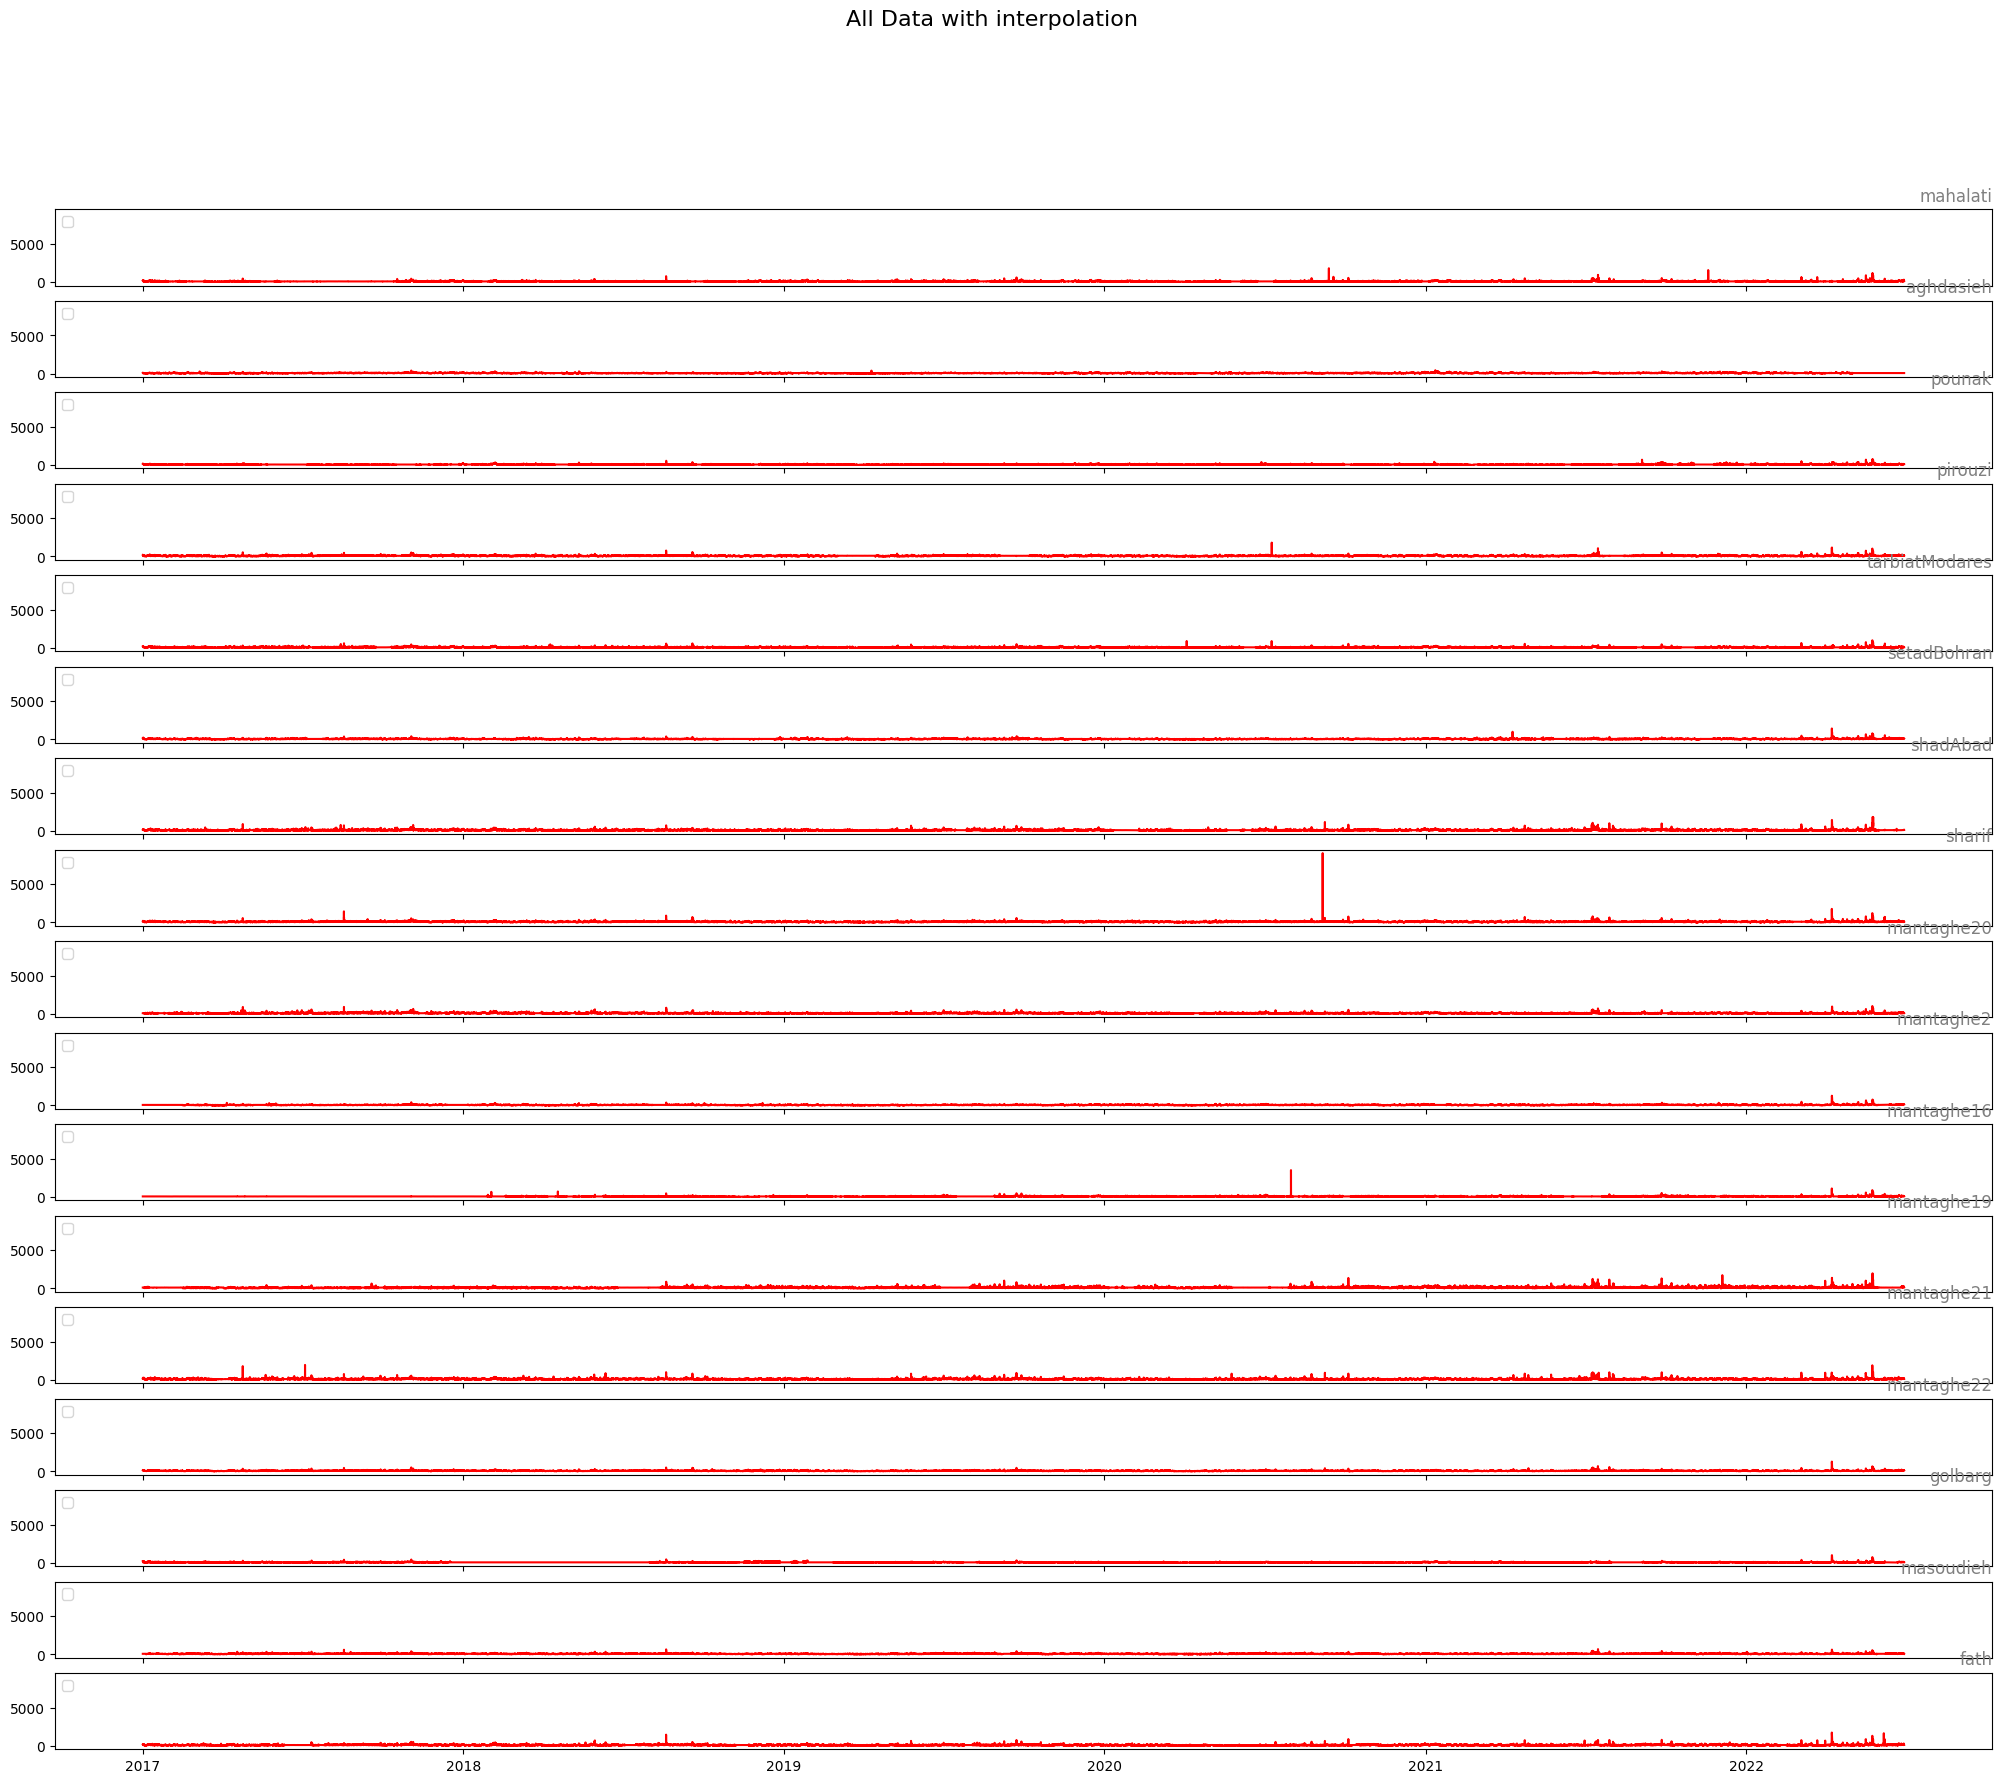

In [ ]:
def plotMultiline(cvc):
    t = cvc.index
    headerList =cvc.columns.tolist()
    fig, axes = plt.subplots(len(headerList), 1, sharex=True, sharey=True, figsize = (25, 20))
    #fig.set_figheight(10)
    #fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
    fig.suptitle("All air pollution Data", fontsize=16)
    i = 0
    for item in headerList:

        tempppd = pd.DataFrame(columns=['A'])
        tempppd['interpolate'] = cvc[item]
        axes[i].plot(t, tempppd['interpolate'], 'r' )
        #axes[i].plot(t, temppd['main'], 'k--', label="Before interpolation")

        axes[i].set_title(item, loc='right', color='gray' )
       # axes[i].plot(temppd)
        axes[i].legend(loc='upper left');
        i += 1
import matplotlib.pyplot as plt
import pandas as pd
#url = 'https://docs.google.com/spreadsheets/d/1lpuG4rGmb-erP_-JqYMgogRdL8eH4xQi/edit?usp=sharing&ouid=114255579325312313141&rtpof=true&sd=true'
from google.colab import drive
drive.mount('/content/drive')
newURL='/content/drive/My Drive/AIRNOW/'
temppd = pd.read_excel(newURL+'pm10_Imputation_GXBoost.xlsx')
temppd['Datetime'] = pd.DatetimeIndex(temppd['Datetime'])
temppd.set_index('Datetime',inplace = True)
temppd = temppd.sort_index()
plotMultiline(temppd)


In [ ]:
display(y_test)

array([ 87., 110.,  82., ...,  52.,  53.,  45.])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = xgb.XGBRegressor(objective="reg:squarederror",random_state=42,
                             eval_metric='rmse',
 #  learning_rate=0.01,
 #   max_depth=3,
  #   min_child_weight=3,
  #    n_estimators=5000
  #    , subsample=.9,
        learning_rate=0.05,
    max_depth=10,
     min_child_weight=3,
      n_estimators=700
      , subsample=.7,
 tree_method = 'gpu_hist',
 missing=None)
#params = {}
#params['eval_metric'] = ['rmse']
#params['n_estimators'] = [700]
#params['subsample'] = [0.7]
#params['min_child_weight'] = [3]
#['learning_rate'] = [0.05]
#params['max_depth'] = [10]
#params  = {'subsample': 0.7,
 #'n_estimators': 700,
 #'min_child_weight': 3,
 #'max_depth': 10,
 #'learning_rate': 0.05,
 #'eval_metric' : 'rmse'}
#params['tree_method'] = ['gpu_hist']
# Fit xgboost onto data
regressor.fit(X_train
    ,y_train
    ,verbose=True
 #   ,early_stopping_rounds=120
    ,eval_metric='rmse'
 #   learning_rate = '0.05',
 #   subsample =  0.7,
 #n_estimators = 700,
# min_child_weight = 3,
# max_depth = 10,
 #   eval_set=[(X_test,y_test)]
 #   ,predictor = 'gpu_predictor'

    )
y_pred_train = regressor.predict(X_train)

mse_train=mean_squared_error(y_train, y_pred_train)
y_pred_test = regressor.predict(X_test)

mse_test=mean_squared_error(y_test, y_pred_test)

print("RMSE Test: "+np.sqrt(mse_test).astype(str))
print("RMSE Train: "+np.sqrt(mean_squared_error(y_train, y_pred_train)).astype(str))

RMSE Test: 19.059089392350398
RMSE Train: 4.064371216153115


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on tst set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9907215122920653
Coefficient of determination R^2 <-- on tst set: 0.6331432694880998


In [ ]:
y_pred_null  = regressor.predict(np.array(dfisna[list_i]))


In [ ]:

df_null_train = pd.DataFrame({
     'mantaghe22imputed': y_pred_null.ravel()
   # 'price': price.ravel()
})  # 1st row as the column names
dfisna.reset_index(inplace=True)
df_null_train['Datetime'] = dfisna['Datetime']
df_null_train['Datetime'] = pd.DatetimeIndex(df_null_train['Datetime'])
df_null_train.set_index('Datetime',inplace = True)
df_null_train = df_null_train.sort_index()
dfisna['Datetime'] = pd.DatetimeIndex(dfisna['Datetime'])
dfisna.set_index('Datetime',inplace = True)
dfisna = dfisna.sort_index()
#newtrain.to_excel('impute_using_knn.xlsx')
#from google.colab import files
#files.download('impute_using_knn.xlsx')

In [ ]:
df_null_pred = pd.DataFrame({
     'mantaghe22imputed': y_pred_train.ravel()
   # 'price': price.ravel()
})  # 1st row as the column names
dfnotna.reset_index(inplace=True)
df_null_pred['Datetime'] = dfnotna['Datetime']
df_null_pred['Datetime'] = pd.DatetimeIndex(df_null_pred['Datetime'])
df_null_pred.set_index('Datetime',inplace = True)
df_null_pred = df_null_pred.sort_index()
dfnotna['Datetime'] = pd.DatetimeIndex(dfnotna['Datetime'])
dfnotna.set_index('Datetime',inplace = True)
dfnotna = dfnotna.sort_index()

In [ ]:
df_null_train.reset_index(inplace=True)
df_null_pred.reset_index(inplace=True)
df_all = pd.merge(df_null_train,df_null_pred, how='outer',on=df_null_train.columns.to_list() )
df_all['Datetime'] = pd.DatetimeIndex(df_all['Datetime'])
df_all.set_index('Datetime',inplace = True)
df_all = df_all.sort_index()
df_null_pred['Datetime'] = pd.DatetimeIndex(df_null_pred['Datetime'])
df_null_pred.set_index('Datetime',inplace = True)
predictions = df_null_pred.sort_index()
df_null_train['Datetime'] = pd.DatetimeIndex(df_null_train['Datetime'])
df_null_train.set_index('Datetime',inplace = True)
df_null_train = df_null_train.sort_index()
#print(df_all.head())

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X_train,y_train,cv=5)
score.mean()

0.6668499868296551

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


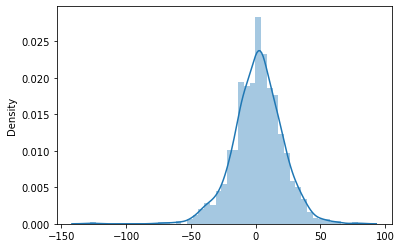

In [ ]:
import seaborn as sns
sns.distplot(y_test-y_pred_test)

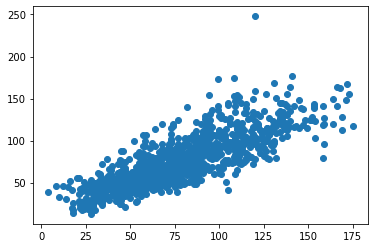

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [500] #, 600, 700, 800, 900, 1000, 1100, 1200]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.03']
# Maximum number of levels in tree
max_depth = [5, 50,500]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.5,0.9,0.7]
# Minimum child weight parameters
min_child_weight=[3,5,7]



In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight,
               'gamma': [1, 0.1, 0.01, 0.001]}

print(random_grid)

{'n_estimators': [500], 'learning_rate': ['0.05', '0.1', '0.2', '0.03'], 'max_depth': [5, 50, 500], 'subsample': [0.5, 0.9, 0.7], 'min_child_weight': [3, 5, 7], 'gamma': [1, 0.1, 0.01, 0.001]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=4, random_state=42, n_jobs = 1)

In [ ]:
xg_random.fit(X_train
    ,y_train
   ,verbose=False
#    ,early_stopping_rounds=120
    ,eval_metric='rmse'
    ,eval_set=[(X_test,y_test)])
import pickle
# open a file, where you ant to store the data
newURL='/content/drive/My Drive/AIRNOW/'
file = open(newURL+'xg_random2.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
xg_random.fit(X_train
    ,y_train
   ,verbose=False
#    ,early_stopping_rounds=120
    ,eval_metric='rmse'
    ,eval_set=[(X_test,y_test)])
import pickle
# open a file, where you ant to store the data
newURL='/content/drive/My Drive/AIRNOW/'
file = open(newURL+'xg_random.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  37.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  28.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  28.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  27.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  25.1s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=  40.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=  39.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=  40.0s
[CV] END learning_ra

In [ ]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 700,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [ ]:
xg_random.best_score_

-437.72982435303413

In [ ]:
import pickle
# open a file, where you ant to store the data
newURL='/content/drive/My Drive/AIRNOW/'
file = open(newURL+'random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)

In [ ]:
y_pred_test=xg_random.predict(X_test)
y_pred_train=xg_random.predict(X_train)

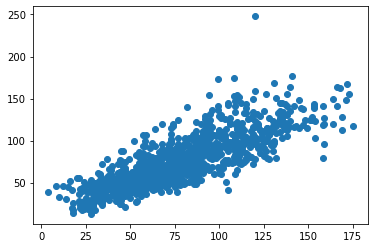

In [ ]:
plt.scatter(y_test,y_pred_test)

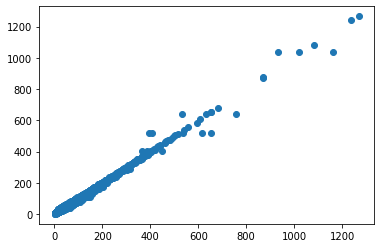

In [ ]:
plt.scatter(y_train,y_pred_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


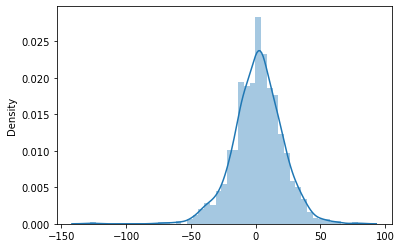

In [ ]:
sns.distplot(y_test-y_pred_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


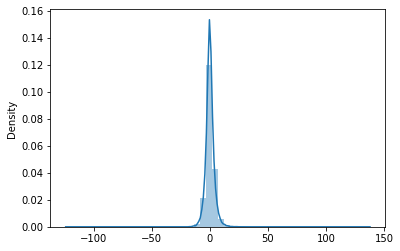

In [ ]:
sns.distplot(y_train-y_pred_train)


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

MAE: 12.726243237770896
MSE: 304.12293845596594
RMSE: 17.439120919816055
R^2: 0.7095285598924568


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R^2:', metrics.r2_score(y_train, y_pred_train))

MAE: 0.21571433670920187
MSE: 0.10575673126373887
RMSE: 0.3252026003336057
R^2: 0.9999031421061961


In [ ]:
mse_train=mean_squared_error(y_train, y_pred_train)
mse_test=mean_squared_error(y_test, y_pred_test)

print("RMSE Test: "+np.sqrt(mse_test).astype(str))
print("RMSE Train: "+np.sqrt(mse_train).astype(str))

RMSE Test: 17.439120919816055
RMSE Train: 0.3252026003336057


In [ ]:
y_pred = xg_random.predict(np.array(dfnotna[list_i]))

In [ ]:
from google.colab import files
newURL='/content/drive/My Drive/AIRNOW/'
df = pd.DataFrame(y_pred, columns=['mantaghe22'])
df.to_excel(newURL+'pm10_pred_mantaghe22_xgboost.xlsx')


In [ ]:
#Randomized Search CV
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#print(n_estimators)
# Number of trees in random forest
n_estimators = [ 400, 600, 800, 1000, 1200]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.4']
# Maximum number of levels in tree
max_depth = [5, 15, 30]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[1,50,100]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [400, 600, 800, 1000, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.4'], 'max_depth': [5, 15, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [1, 50, 100]}


In [ ]:
gridsearch_xgb = xgb.XGBRegressor(objective="reg:squarederror",random_state=42,
                             eval_metric='rmse',
 #  learning_rate = 0.01,
#    subsample =  0.7,
# n_estimators = 3000,
# min_child_weight = 800,
# max_depth = 10,
 tree_method = 'gpu_hist',
 missing=None)

In [ ]:
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor

#X_train, y_train = make_regression(n_features=6, n_targets=6)

gsc = GridSearchCV(
            estimator=gridsearch_xgb,
            param_grid = random_grid,scoring='neg_mean_squared_error',  cv = 5, verbose=4, n_jobs=-1)

grid_result = gsc.fit(X_train
    ,y_train
  #  ,verbose=True
 #   ,early_stopping_rounds=120
    ,eval_metric='rmse',

    eval_set=[(X_test,y_test)]
#    ,predictor = 'gpu_predictor'
    )
import pickle
# open a file, where you ant to store the data
newURL='/content/drive/My Drive/AIRNOW/'
file = open(newURL+'xg_random_grid.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


KeyboardInterrupt: ignored

In [ ]:
print(grid_result.best_params_)

{'estimator__learning_rate': 0.05}


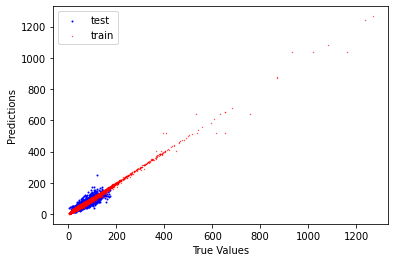

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
y_train, y_pred_train
ax1.scatter(y_test['mantaghe22'],y_pred_test, s=1, c='b', marker="o", label='test')
ax1.scatter(y_train['mantaghe22'], y_pred_train, s=.1, c='r', marker="o", label='train')
plt.legend(loc='upper left');
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()